# `Matplotlib` 进阶
<div>
<img src='https://matplotlib.org/_static/logo2_compressed.svg' width='400'/>
</div>

-----------------
主讲人：李显祥

大气科学学院

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

## `Matplotlib` 的几种调用方法

参考 [https://matplotlib.org/faq/usage_faq.html#coding-styles](https://matplotlib.org/faq/usage_faq.html#coding-styles):
1. `pyplot` 方法
```python
 import matplotlib.pyplot as plt
 plt.plot(x,y)
```
2. 面向对象方法 （Object oriented）
```python
 import matplotlib.pyplot as plt
 fig,ax = plt.subplots()
 ax.plot(x,y)
```
3. 嵌入图形界面的调用方法

In [2]:
# create some data to plot
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
z = np.sin(6*x)

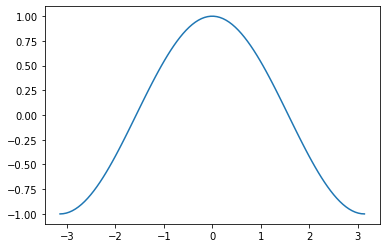

In [3]:
plt.plot(x, y)

<div>
    <img src='https://matplotlib.org/devdocs/_images/anatomy.png' width='600'/>
</div>   

## Figure and Axes

The figure is the highest level of organization of matplotlib objects. If we want, we can create a figure explicitly.

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(13, 5))

<Figure size 936x360 with 0 Axes>

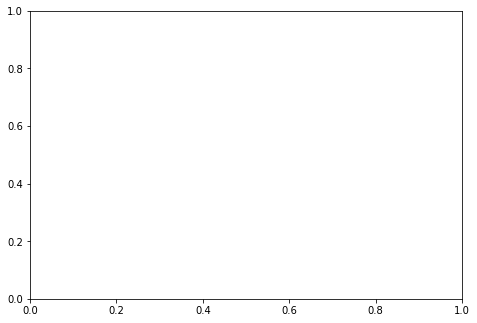

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

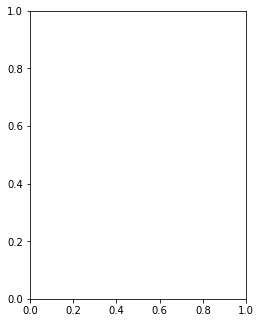

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 1])

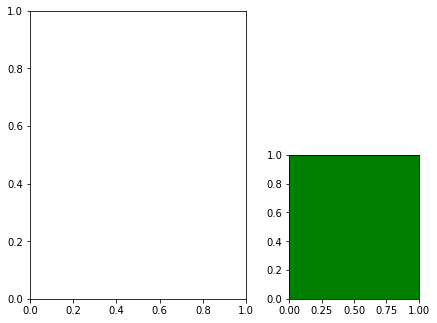

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax2 = fig.add_axes([0.6, 0, 0.3, 0.5], facecolor='g')

## Subplots

Subplot syntax is one way to specify the creation of multiple axes.

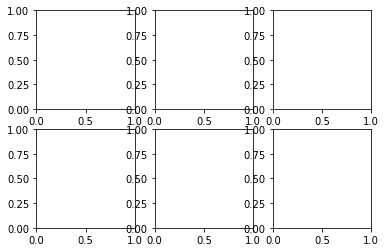

In [9]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=3)

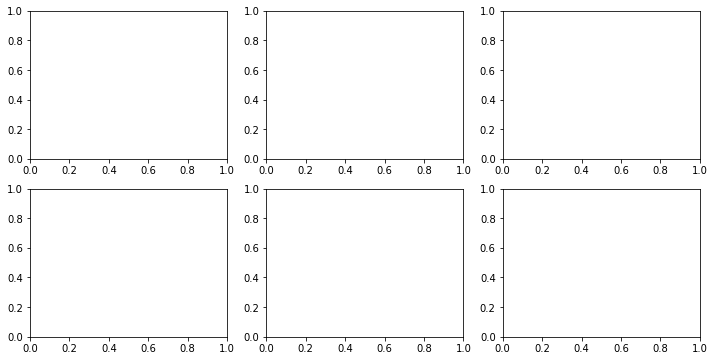

In [10]:
fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(nrows=2, ncols=3)

In [11]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11909e190>,
      dtype=object)

There is a shorthand for doing this all at once.

**This is our recommended way to create new figures!**

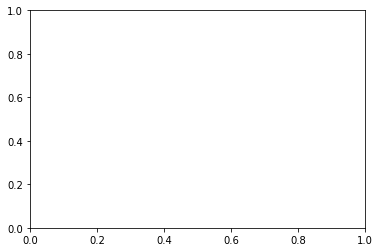

In [12]:
fig, ax = plt.subplots()

In [13]:
ax

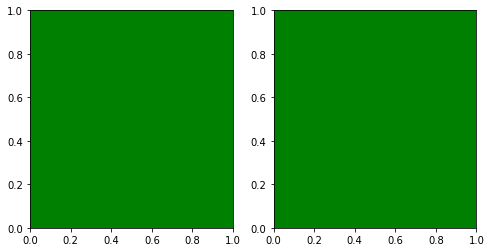

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), subplot_kw={'facecolor': 'g'})

In [15]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118e59610>,
      dtype=object)

## Drawing into Axes

All plots are drawn into axes. It is easiest to understand how matplotlib works if you use the [object-oriented style](https://matplotlib.org/faq/usage_faq.html#coding-styles).

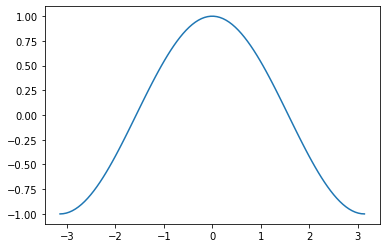

In [16]:
fig, ax = plt.subplots()
ax.plot(x, y)

我们也可以用 `pyplot` 来画出同样的图 (见前面的示例)。

但是当我们要画多个子图的时候，面向对象的方法就显示出威力了。

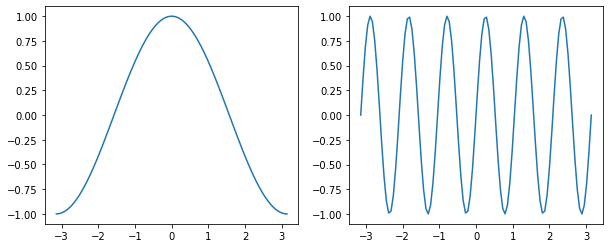

In [17]:
#fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
#ax0, ax1 = axes
fig,[ax0,ax1] = plt.subplots(figsize=(10, 4), ncols=2)
ax0.plot(x, y)
ax1.plot(x, z)

## 坐标轴标注 Labels

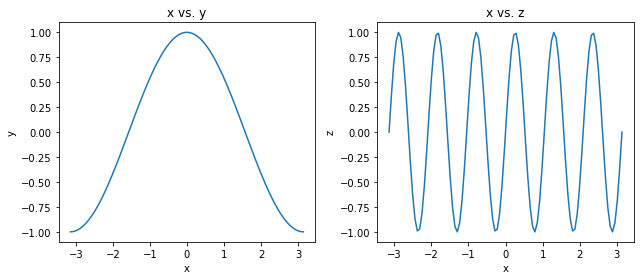

In [18]:
fig, (ax0, ax1) = plt.subplots(figsize=(9, 4), ncols=2)

ax0.plot(x, y)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('x vs. y')

ax1.plot(x, z)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_title('x vs. z')

# squeeze everything in
plt.tight_layout()

## 线型

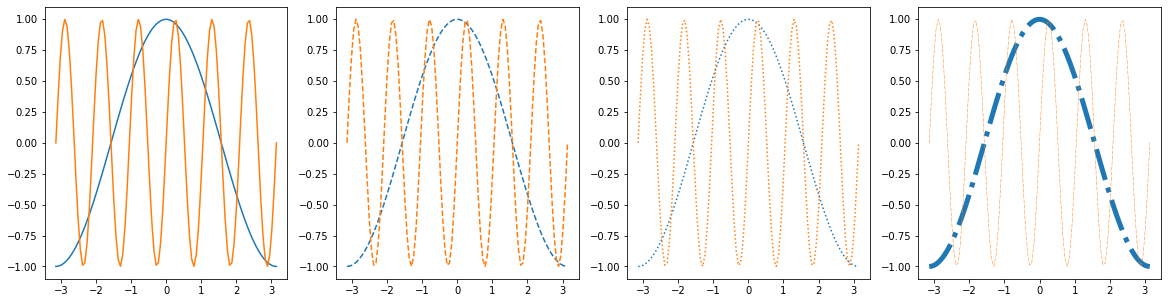

In [19]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=4)
axes[0].plot(x, y, linestyle='-')
axes[0].plot(x, z, linestyle='solid')

axes[1].plot(x, y, linestyle='dashed')
axes[1].plot(x, z, linestyle='--')

axes[2].plot(x, y, linestyle='dotted')
axes[2].plot(x, z, linestyle=':')

axes[3].plot(x, y, linestyle='dashdot', linewidth=5)
axes[3].plot(x, z, linestyle='-.', linewidth=0.5)

## 颜色

根据 [colors documentation](https://matplotlib.org/2.0.2/api/colors_api.html)，有一常用些颜色有专门的名字：

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

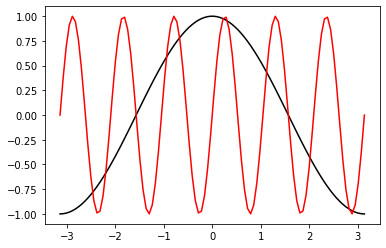

In [20]:
fig, ax = plt.subplots()
ax.plot(x, y, color='k')
ax.plot(x, z, color='r')

指定颜色的其它方式：

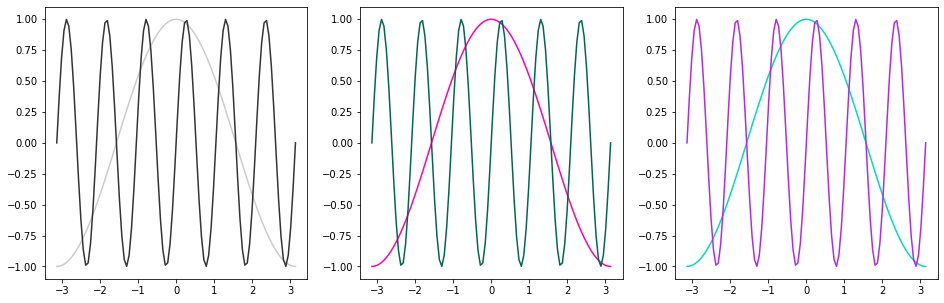

In [21]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)

# grayscale
axes[0].plot(x, y, color='0.8')
axes[0].plot(x, z, color='0.2')

# RGB tuple
axes[1].plot(x, y, color=(1, 0, 0.7))
axes[1].plot(x, z, color=(0, 0.4, 0.3))

# HTML hex code
axes[2].plot(x, y, color='#00dcba')
axes[2].plot(x, z, color='#b029ee') 

如果不指定颜色，`matplotlib` 内部会循环使用默认的颜色列表：

In [22]:
plt.rcParams['axes.prop_cycle']

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


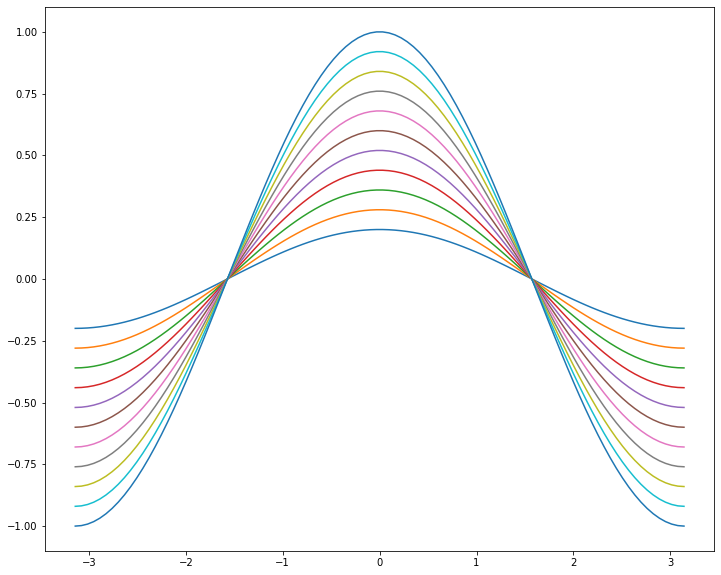

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
for factor in np.linspace(0.2, 1, 11):
    ax.plot(x, factor*y)

## Markers

There are [lots of different markers](https://matplotlib.org/api/markers_api.html) availabile in `matplotlib!

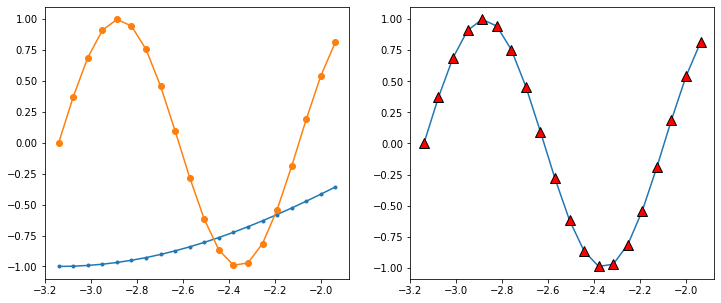

In [24]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

axes[0].plot(x[:20], y[:20], marker='.')
axes[0].plot(x[:20], z[:20], marker='o')

axes[1].plot(x[:20], z[:20], marker='^',
             markersize=10, markerfacecolor='r',
             markeredgecolor='k')

## Label, Ticks, and Gridlines

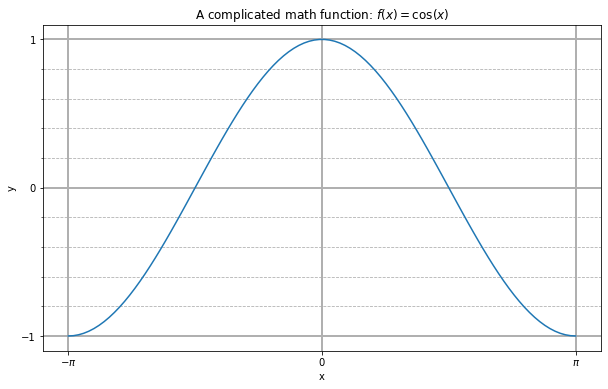

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'A complicated math function: $f(x) = \cos(x)$')

ax.set_xticks(np.pi * np.array([-1, 0, 1]))
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([-1, 0, 1])

ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
#ax.set_xticks(np.arange(-3, 3.1, 0.2), minor=True)

ax.grid(which='minor', linestyle='--')
ax.grid(which='major', linewidth=2)

## fill_between

Text(0.5, 1.0, 'Fill Between')

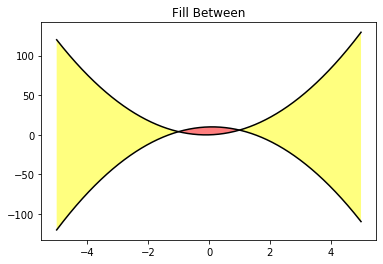

In [26]:
x = np.arange(-5, 5, 0.01)
y1 = -5*x*x + x + 10
y2 = 5*x*x + x

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >y1, facecolor='yellow', alpha=0.5)
ax.fill_between(x, y1, y2, where=y2 <=y1, facecolor='red', alpha=0.5)
ax.set_title('Fill Between')

Text(0.5, 1.0, 'Between y1 and y2')

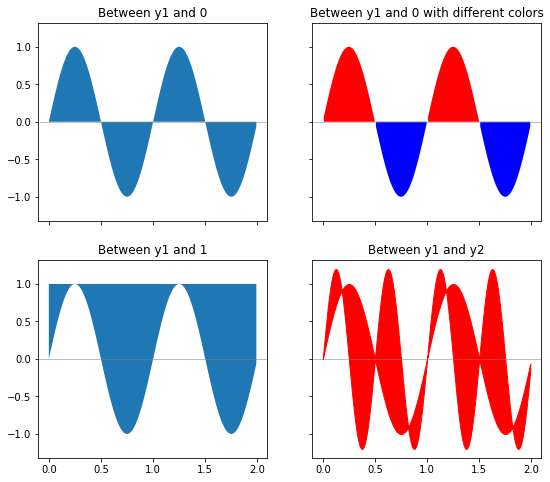

In [27]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 1.2 * np.sin(4 * np.pi * x)

fig,ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(9, 8))
ax[0,0].fill_between(x,0,y1)
ax[0,0].axhline(0,color='grey',alpha=0.5,lw=1)
ax[0,0].set_title('Between y1 and 0')

ax[0,1].fill_between(x,0,y1,where=y1>0,facecolor='r')
ax[0,1].fill_between(x,0,y1,where=y1<0,facecolor='b')
ax[0,1].axhline(0,color='grey',alpha=0.5,lw=1)
ax[0,1].set_title('Between y1 and 0 with different colors')

ax[1,0].fill_between(x,y1,1)
ax[1,0].axhline(0,color='grey',alpha=0.5,lw=1)
ax[1,0].set_title('Between y1 and 1')

ax[1,1].fill_between(x,y1,y2,color='r')
ax[1,1].axhline(0,color='grey',alpha=0.5,lw=1)
ax[1,1].set_title('Between y1 and y2')

- `fill_between` 是对于 `y` 轴数据进行填充
- 对应的也有 `fill_betweenx` 来对 `x` 轴数据进行填充。

## Matplotlib styles

```python
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 或者临时改变 style
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
```

[Matplotlib style sheets reference](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py)
                                    
总有一款适合你！                        

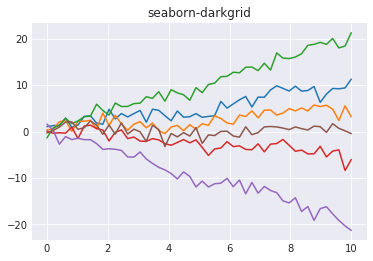

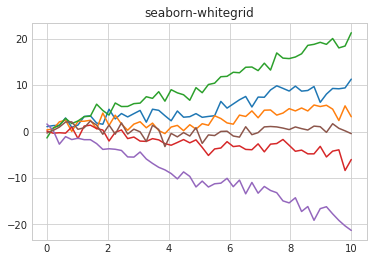

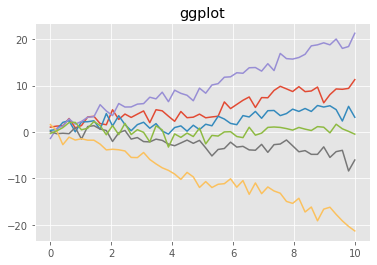

In [28]:
def plot_fig(style):  
  x = np.linspace(0, 10)

  # Fixing random state for reproducibility
  np.random.seed(19680801)
  
  fig, ax = plt.subplots()

  ax.plot(x, np.sin(x) + x + np.random.randn(50))
  ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
  ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
  ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
  ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
  ax.plot(x, np.sin(x) + np.random.randn(50))
  ax.set_title(style)
    
for s in ['seaborn-darkgrid','seaborn-whitegrid','ggplot']:
    with plt.style.context(s):
        plot_fig(s)

## 图例 Legend

图例一般由以下部分组成

- legend entry

A legend is made up of one or more legend entries. An entry is made up of exactly one key and one label.
- legend key

The colored/patterned marker to the left of each legend label.
- legend label

The text which describes the handle represented by the key.
- legend handle

The original object which is used to generate an appropriate entry in the legend.

`plt.legend`, `fig.legend`

```python
plt.legend()
plt.legend(labels)
plt.legend(handles, labels)
```

- 如果不传递任何参数，则根据之前 `plot` 生成的对象的 `label` 来产生图例
- 图例的放置位置：`loc` 参数，默认为 `best`，即自动选择最优位置（不保证是最优的！）。
- 其它位置为 
 - 'best'	        0
 - 'upper right'	1
 - 'upper left'	    2
 - 'lower left'	    3
 - 'lower right'	4
 - 'right'	        5
 - 'center left'	6
 - 'center right'	7
 - 'lower center'	8
 - 'upper center'	9
 - 'center'	       10
- 以下划线开头的 `label` 将被`legend` 自动排除  

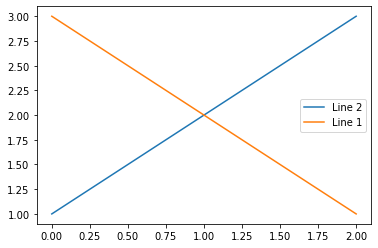

In [29]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
plt.legend()

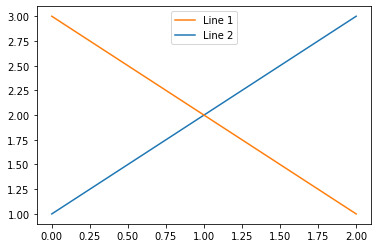

In [30]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3])
line_down, = ax.plot([3, 2, 1])
# plt.legend(handles, labels)
plt.legend([line_down, line_up], ['Line 1', 'Line 2'], loc='upper center') 

我们也可以用 `bbox_to_anchor` 来指定 `legend` 位置，其形式为 `[x,y,width,height]`, 
前两个为相对于 `ax` 的位置，后两个为其大小（可省略）。

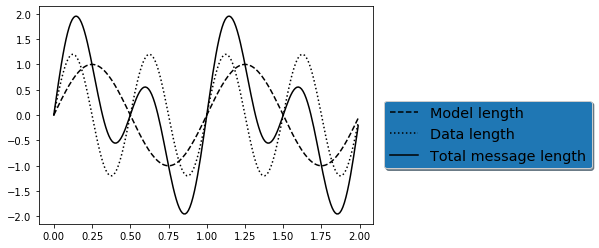

In [31]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, y1, 'k--', label='Model length')
ax.plot(x, y2, 'k:', label='Data length')
ax.plot(x, y1 + y2, 'k', label='Total message length')

legend = ax.legend(bbox_to_anchor=(1.01,0.6), shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

## 插图 Inset

很多时候我们需要放置一张小图来表现一些细节（比如中国地图的南海小图），这时我们需要一个插图 (inset)。
<div><img src='../cartopy/China_map_mercator.png' width=300 align='center'/></div>

可以用 `fig.add_axes` 来实现，其第一个参数为四个 `float` 组成的 `list`，分别表示插图的位置和大小 `[x,y,width,height]`。

[]

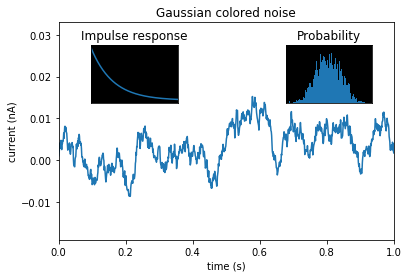

In [32]:
np.random.seed(19680801)
# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set_title('Probability')
right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set_title('Impulse response')
left_inset_ax.set_xlim(0, 0.2)
left_inset_ax.set_xticks([])
left_inset_ax.set_yticks([])

## 双`x` 或 `y` 轴

### 第一种情况
两个坐标轴绘制同一个数据，但显示不同的坐标数据，比如一个显示角度，一个显示弧度，或一个显示摄氏度，一个显示华氏度。

我们可以用 `axes.Axes.secondary_xaxis` 和 `axes.Axes.secondary_yaxis` 来实现这个效果. 

我们需要提供一个 正向 和一个 反向 转换函数作为参数。

Text(0.5, 0, 'angle [rad]')

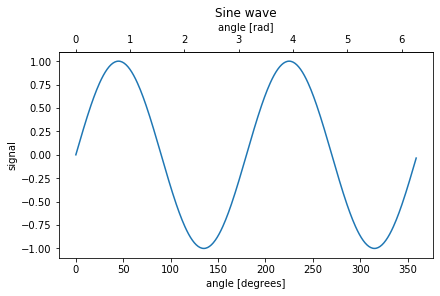

In [33]:
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import AutoLocator, AutoMinorLocator

fig, ax = plt.subplots(constrained_layout=True)
dx = np.arange(0, 360, 1)
dy = np.sin(2 * dx * np.pi / 180)
ax.plot(dx, dy)
ax.set_xlabel('angle [degrees]') 
ax.set_ylabel('signal')
ax.set_title('Sine wave')

def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')

/Users/lixx/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/Users/lixx/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


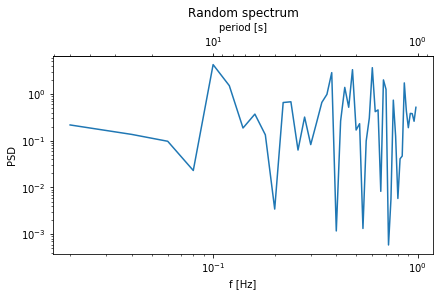

In [34]:
fig, ax = plt.subplots(constrained_layout=True)
dx = np.arange(0.02, 1, 0.02)
np.random.seed(196808)
dy = np.random.randn(len(dx)) ** 2
ax.loglog(dx, dy)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')

def forward(x):
    return 1 / x

def inverse(x):
    return 1 / x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('period [s]') 
plt.show()

Text(0, 0.5, '$T\\ [^oF]$')

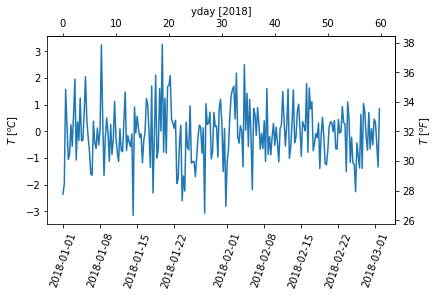

In [35]:
dates = [datetime.datetime(2018, 1, 1) + datetime.timedelta(hours=k * 6) for k in range(240)]
temperature = np.random.randn(len(dates))
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(dates, temperature)
ax.set_ylabel(r'$T\ [^oC]$')
#plt.xticks(rotation=70)
labels = ax.get_xticklabels()
plt.setp(labels,rotation=70)

def date2yday(x):
    """Convert matplotlib datenum to days since 2018-01-01."""
    y = x - mdates.date2num(datetime.datetime(2018, 1, 1))
    return y

def yday2date(x):
    """Return a matplotlib datenum for *x* days after 2018-01-01."""
    y = x + mdates.date2num(datetime.datetime(2018, 1, 1))
    return y

secaxx = ax.secondary_xaxis('top', functions=(date2yday, yday2date))
secaxx.set_xlabel('yday [2018]')

def CtoF(x):
    return x * 1.8 + 32

def FtoC(x):
    return (x - 32) / 1.8

secaxy = ax.secondary_yaxis('right', functions=(CtoF, FtoC))
secaxy.set_ylabel(r'$T\ [^oF]$')

### 第二种情况

两个坐标轴来绘制不同的数据

- `axis.Axes.twinx`: 两个 `y` 轴 (共享 `x` 轴）

- `axis.Axes.twiny`：两个 `x` 轴 (共享 `y` 轴）

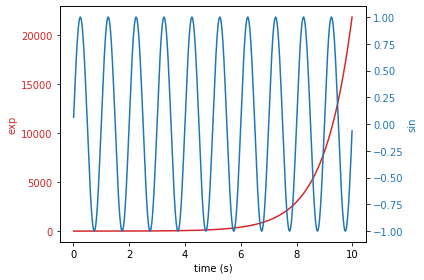

In [36]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

## 时间坐标轴

## 插入标注文本 Annotations

Text(0, 0, 'the maximum')

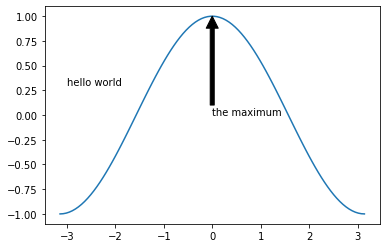

In [37]:
fig, ax = plt.subplots()

x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)

ax.plot(x, y)
ax.text(-3, 0.3, 'hello world')
ax.annotate('the maximum', xy=(0, 1),
             xytext=(0, 0), arrowprops={'facecolor': 'k'})

Text(1.2, 0.95, 'the maximum')

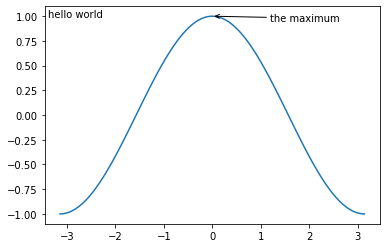

In [38]:
fig, ax = plt.subplots()

x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)

ax.plot(x, y)
ax.text(0.01, 0.95, 'hello world', transform=ax.transAxes)
ax.annotate('the maximum', xy=(0, 1),
             xytext=(1.2, 0.95), arrowprops={'facecolor': 'k','arrowstyle': '->'})

## 不同 `subplot` 间绘制辅助线

`matplotlib.patches.ConnectionPath` 可以在不同子图间绘制连接线

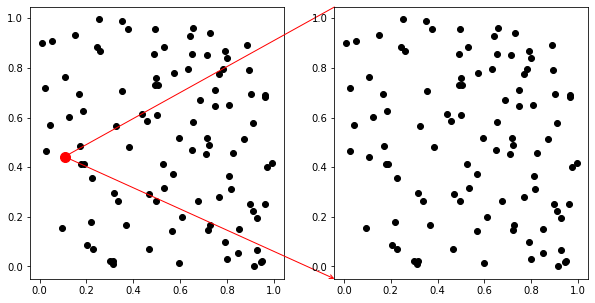

In [39]:
from matplotlib.patches import ConnectionPatch

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

np.random.seed(12345)
datax, datay = np.random.rand(100),np.random.rand(100)

ax1.plot(datax,datay,'ko')
ax2.plot(datax,datay,'ko')

xy=(datax[13],datay[13])
con1 = ConnectionPatch(xyA=xy, xyB=(0,0),coordsA="data", coordsB="axes fraction",
                      arrowstyle='->', axesA=ax1, axesB=ax2, color='red')
con2 = ConnectionPatch(xyA=xy, xyB=(0,1),coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax2, color='red')

ax2.add_artist(con1)
ax2.add_artist(con2)

ax1.plot(datax[13],datay[13],'ro',markersize=10)

## 输出文件

`plt.save`, `fig.save`

参数：

- 文件名：根据后缀名决定保存的文件格式，`png`,`jpg`,`gif`,`eps`,`pdf`,...

- `dpi`：`dots per inches`，图片的精度，出版的图片一般要求 `dpi > 300`。

- `bbox_inches="tight"`：让保存的图片更加紧凑，去掉周边的空白

## 动画

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


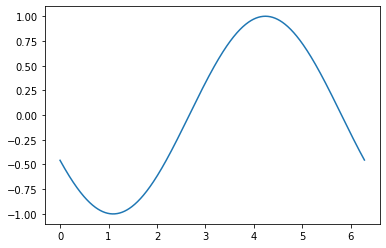

In [40]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,

def animate(i):
    line.set_ydata(np.sin(x + i / 10))  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True)

ani.save("movie.gif", dpi=80)

# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

![](movie.gif)

或者，我们也可以直接生成一些图片，把它们串起来。

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


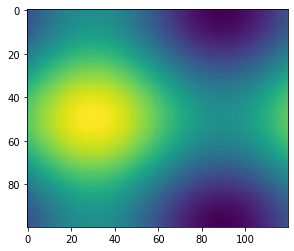

In [41]:
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('movie2.gif',dpi=80)

![](movie2.gif)

## 绘制复杂的 `subplot`

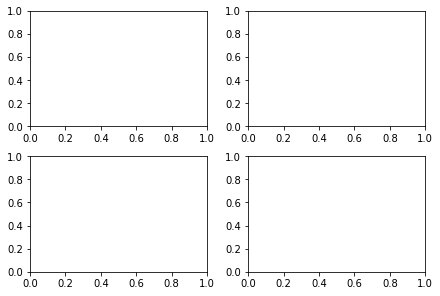

In [42]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

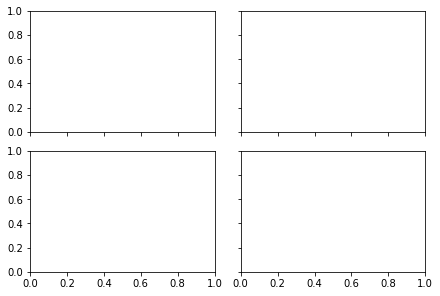

In [43]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, constrained_layout=True)

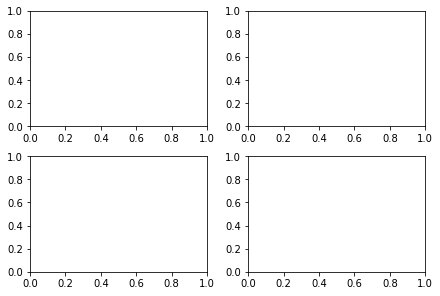

In [44]:
import matplotlib.gridspec as gridspec

fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

Text(0.5, 1.0, 'gs[-1, -2]')

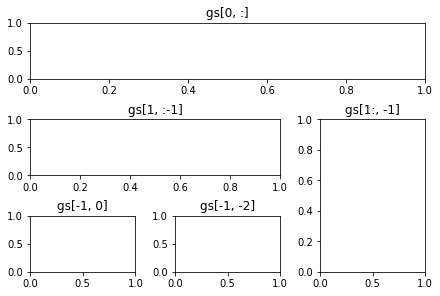

In [45]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

![](https://matplotlib.org/_images/sphx_glr_gridspec_nested_001.png)

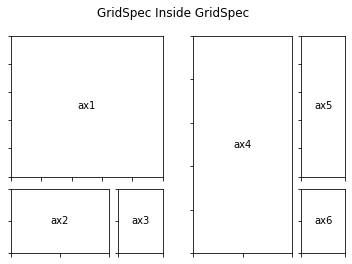

In [46]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

# gridspec inside gridspec
f = plt.figure()

gs0 = gridspec.GridSpec(1, 2, figure=f)

gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0])

ax1 = f.add_subplot(gs00[:-1, :])
ax2 = f.add_subplot(gs00[-1, :-1])
ax3 = f.add_subplot(gs00[-1, -1])

# the following syntax does the same as the GridSpecFromSubplotSpec call above:
gs01 = gs0[1].subgridspec(3, 3)

ax4 = f.add_subplot(gs01[:, :-1])
ax5 = f.add_subplot(gs01[:-1, -1])
ax6 = f.add_subplot(gs01[-1, -1])

plt.suptitle("GridSpec Inside GridSpec")
format_axes(f)

以下是另外一种实现方法

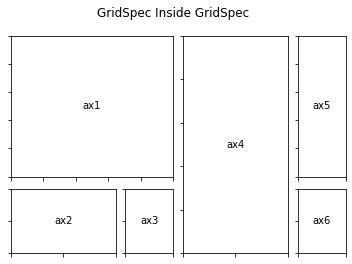

In [47]:
# gridspec inside gridspec
f = plt.figure()

gs0 = gridspec.GridSpec(3, 6, figure=f)

ax1 = f.add_subplot(gs0[:-1, 0:3])
ax2 = f.add_subplot(gs0[-1, 0:2])
ax3 = f.add_subplot(gs0[-1, 2])

ax4 = f.add_subplot(gs0[:, 3:-1])
ax5 = f.add_subplot(gs0[:-1, -1])
ax6 = f.add_subplot(gs0[-1, -1])

plt.suptitle("GridSpec Inside GridSpec")
format_axes(f)

## 矢量箭头 quiver

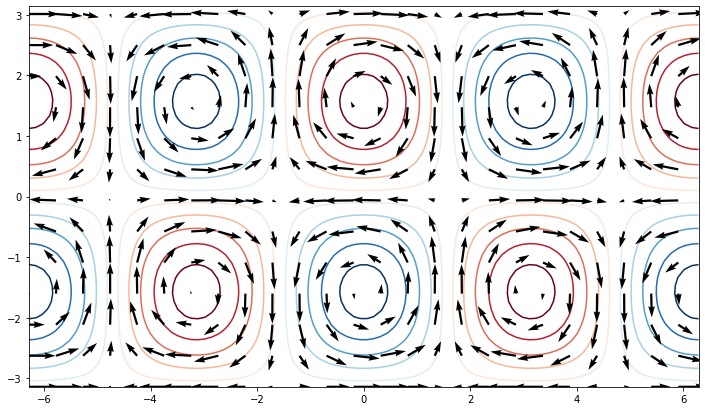

In [48]:
x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)
clevels = np.arange(-1, 1, 0.2) + 0.1

u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)

fig, ax = plt.subplots(figsize=(12, 7))
ax.contour(xx, yy, f, clevels, cmap='RdBu_r', extend='both', zorder=0)
ax.quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)

## 流线图 streamplot

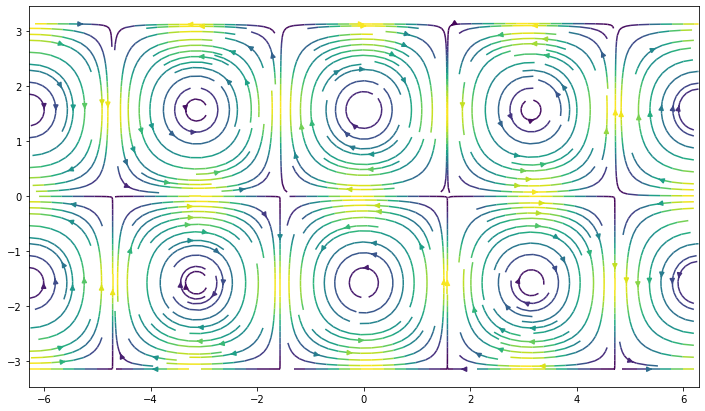

In [49]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))

## 中文字体

`Matplotlib` 默认的字体不支持中文；我们必须指定支持中文的字体。

`matplotlib.font_manager` 可以用来管理字体

Text(0.5, 1.0, '中文标注')

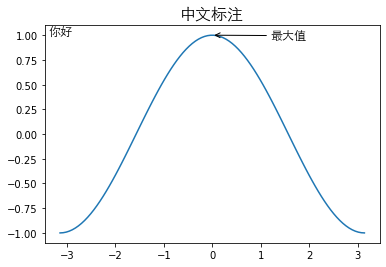

In [50]:
import matplotlib as mpl

# 请使用你的电脑上的字体文件
myfont = mpl.font_manager.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
fig, ax = plt.subplots()

x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)

ax.plot(x, y)
ax.text(0.01, 0.95, '你好', transform=ax.transAxes, fontproperties=myfont, fontsize=12)
ax.annotate('最大值', xy=(0, 1),
             xytext=(1.2, 0.95), arrowprops={'facecolor': 'k','arrowstyle': '->'},
             fontproperties=myfont, fontsize=12)
ax.set_title('中文标注',fontproperties=myfont, fontsize=16)

## References

1. [https://rabernat.github.io/research_computing_2018/more-matplotlib.html](https://rabernat.github.io/research_computing_2018/more-matplotlib.html)
2. [https://matplotlib.org/tutorials/(https://matplotlib.org/tutorials/)
3. [https://matplotlib.org/gallery/index.html](https://matplotlib.org/gallery/index.html)